In [21]:
# Import necessary modules
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import pickle
from tqdm import tqdm
from scipy import signal
import random

In [22]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
d_version = 'v4.0'
seg_num = 12
sample0_raw_path = '/data0/practical-sose23/brain-age/data/bap/raw/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp39_eyes_closed.vhdr'
# sample0_pickle_path = '/data0/practical-sose23/brain-age/data/bap/preprocessed/' + d_version + '/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp39_eyes_closed.pickle'
# sample0_npy_path = '/data0/practical-sose23/brain-age/data/bap/preprocessed/' + d_version + '/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp39_eyes_closed.npy'
sample0_npy_seg_path = '/data0/practical-sose23/brain-age/data/bap/preprocessed/' + d_version + '/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp39_eyes_closed/Exp_eyes_closed_vp39_eyes_closed_' + str(seg_num) + '.npy'

In [24]:
sample0_raw = mne.io.read_raw_brainvision(sample0_raw_path, preload=True)
sample0_raw = sample0_raw.drop_channels(['LE', 'RE'])

# with open(sample0_pickle_path, mode='rb') as in_file:
#     sample0_pickle = pickle.load(in_file)

# with open(sample0_npy_path, 'rb') as in_file:
#     sample0_npy = np.load(in_file)
    
with open(sample0_npy_seg_path, 'rb') as in_file:
    sample0_npy_seg = np.load(in_file)

Extracting parameters from /data0/practical-sose23/brain-age/data/bap/raw/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp39_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_2280039/3263780135.py:1: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  sample0_raw = mne.io.read_raw_brainvision(sample0_raw_path, preload=True)
/tmp/ipykernel_2280039/3263780135.py:1: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', '

In [25]:
print('Shape of raw data: ', sample0_raw.get_data().shape)
# print('Shape of filtered data: ', sample0_pickle.get_data().shape)
# print('Shape of NumPy data: ', sample0_npy.shape)
print('Shape of one segment of NumPy data: ', sample0_npy_seg.shape)

Shape of raw data:  (63, 300003)
Shape of one segment of NumPy data:  (63, 3000)


In [27]:
part_len_in_sec = 1
assert part_len_in_sec <= 30

sfreq1 = 1000
# sfreq2 = sfreq3 = 100
sfreq4 = 100
stride_len_in_sec = 15

stride_len1 = stride_len_in_sec * sfreq1
# stride_len2 = stride_len_in_sec * sfreq2
stride_len3 = stride_len_in_sec * sfreq3

start_idx1 = seg_num * stride_len1
# start_idx2 = seg_num * stride_len3
# start_idx3 = seg_num * stride_len3


signal1 = sample0_raw.get_data()[:, start_idx1:start_idx1 + sfreq1 * part_len_in_sec]
# signal2 = sample0_pickle.get_data()[:, start_idx2:start_idx2 + sfreq2 * part_len_in_sec]
# signal3 = sample0_npy[:, start_idx3:start_idx3 + sfreq3 * part_len_in_sec]
signal4 = sample0_npy_seg[:, :sfreq4 * part_len_in_sec]

In [28]:
print('Shape of raw data: ', signal1.shape)
# print('Shape of filtered data: ', signal2.shape)
# print('Shape of NumPy data: ', signal3.shape)
print('Shape of one segment of NumPy data: ', signal4.shape)

Shape of raw data:  (63, 1000)
Shape of one segment of NumPy data:  (63, 100)


In [29]:
# Define the time axes for each signal
time1 = np.linspace(0, part_len_in_sec, num=signal1.shape[1])
# time2 = np.linspace(0, part_len_in_sec, num=signal2.shape[1])
# time3 = np.linspace(0, part_len_in_sec, num=signal3.shape[1])
time4 = np.linspace(0, part_len_in_sec, num=signal4.shape[1])

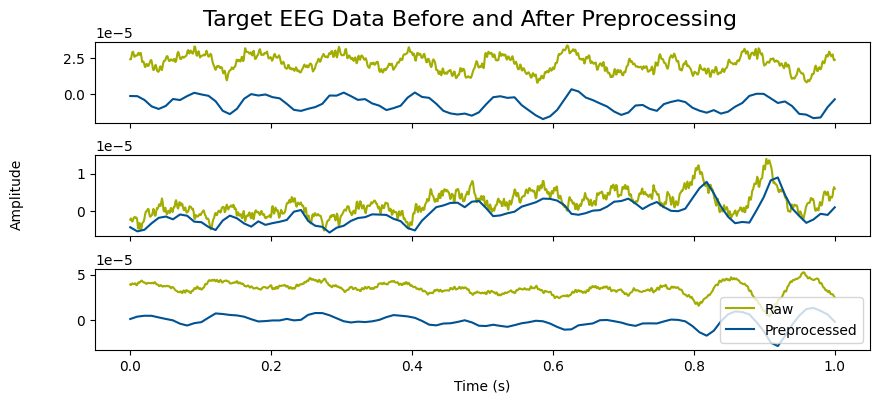

In [98]:
num_channels = 3
channels = random.sample(range(0, signal1.shape[0]), num_channels)

# Create subplots for each channel
fig, axs = plt.subplots(num_channels, sharex=True, figsize=(10, 4))

signals = [signal1, signal4] # signal2, signal3, 
times = [time1, time4] # time2, time3,

# Define colors and line styles for each channel
colors = ['#a2ad00', '#005293', 'b', 'm', 'lightblue']
line_styles = ['-', '-', '-.', ':', '..']
labels = ['Raw', 'Preprocessed']

# Plotting the signals
for i, signal in enumerate(signals):
    for j in range(num_channels):
        axs[j].plot(times[i], signal[channels[j], :], color=colors[i], linestyle=line_styles[i], label=labels[i])

# Display the legend
axs[num_channels - 1].legend(loc='lower right')

fig.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical')
plt.xlabel('Time (s)')

title = fig.suptitle('Target EEG Data Before and After Preprocessing', fontsize=16)
title.set_position([0.5, 0.96])

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.4)

# Display the plot
plt.show()